# Lesson I

## Using FacetGrid, catplot and lmplot

One of Seaborn's most powerful features is its ability to combine multiple smaller plots into a larger visualization that can help identify trends in data with many variables.

### Multiple plots of data

The concept of small multiples is useful for analyzing data with many variables. The idea is that you can quickly identify trends in data by comparing multiple plots side by side using the same scales and axes. These plots are referred to as a **trellis** or **lattice** plot. In data science, this concept is also frequently called **faceting**.

<img src='pictures/comparedata.jpg' width=600 />

In this specific example, we can look at the college tuition data and how it varies across the type of degree the school provides, the region and whether the school is controlled as a public or private institution.

### Tidy Data

* Seaborn's grid plots require data in "tidy format"
    - Each row of the data is single observation
    - Columns contain the variables

<img src='pictures/tidydata.jpg' />

Seaborn can perform a lot of the heavy lifting needed to create these small multiple plots.

## FacetGrid

Seaborn's **FacetGrid** manages the back end data manipulations to make sure that the data is split across rows, columns, and hue and then used to make the appropriate plot type.

The key point to remember is that ```FacetGrid()``` provides a lot of flexibility, but you must use a two step process of defining the Facets and mapping the plot type.

* The ```FacetGrid``` is foundational for many data aware grids
* It allows the user to control how data is distributed across columns, rows, and hue
* Once a ```FacetGrid``` is created, the plot type must be mapped to the grid.

### FacetGrid Categorical Example



In [1]:
# Import Modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Dataset 
df = pd.read_csv('datasets/college_datav3.csv')

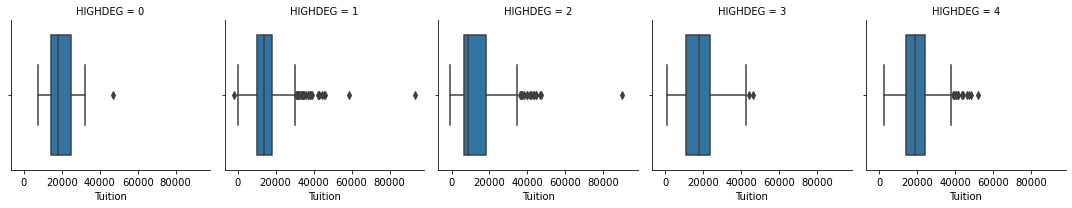

In [2]:
g = sns.FacetGrid(df, col="HIGHDEG")
g.map(sns.boxplot, "Tuition",
      order=["1", "2", "3", "4"])

plt.show()

This example shows how to map a boxplot onto a data-aware ``FacetGrid()``. 
* First Step: Set up ````FacetGrid()```` with column defined as the Highest Degree awarded by the school.
* Next Step: plot a boxplot of the Tuition values
    - We also define the order we want the degrees to be displayed in.

## Catplot()    

Seaborn's ```FacetGrid()``` is very powerful and flexible but involves multiple steps to create. The ```catplot()``` function is a *shortcut* to creating **FacetGrids**.

The underlying returned value is a **FacetGrid** but the process for creating one is much *simpler*. The single ```catplot()``` function takes care of the two step process for you.



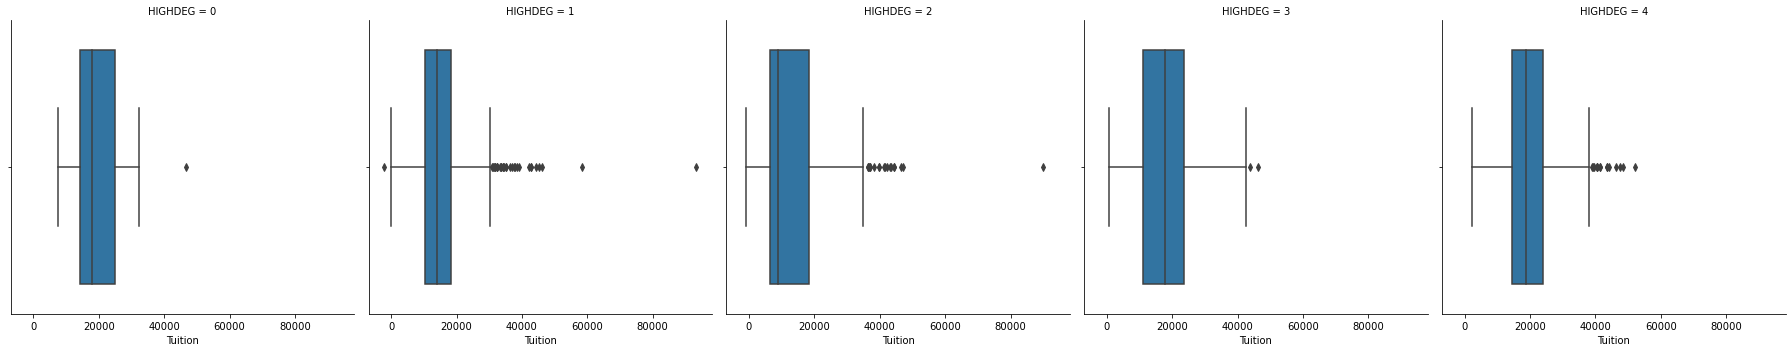

In [3]:
sns.catplot(x='Tuition', data=df,
            col='HIGHDEG', kind='box')

plt.show()

## FacetGrid for Regression

* ```FacetGrid()``` can also be used for scatter or regression plots.

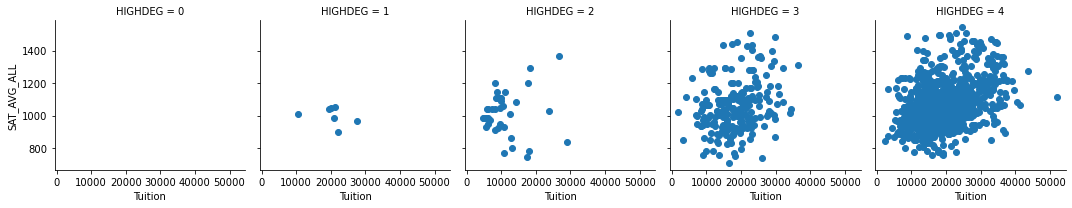

In [4]:
g = sns.FacetGrid(df, col='HIGHDEG')
g.map(plt.scatter, 'Tuition', 'SAT_AVG_ALL')
plt.show()

In this example, we can look at a simple scatter plot of Tuition compared to SAT Average across the different degree categories.

## lmplot

The ```lmplot()``` function is similar to the ```catplot()``` function. It provides a shortcut for plotting regression and scatter plots on *FacetGrid*.

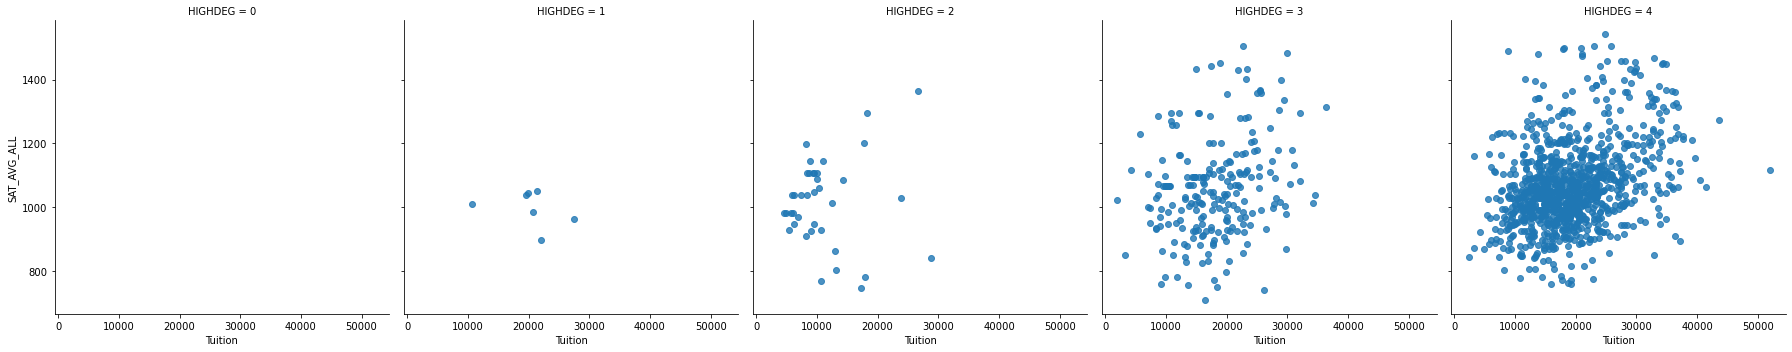

In [5]:
sns.lmplot(data=df, x='Tuition', y='SAT_AVG_ALL',
           col='HIGHDEG', fit_reg=False)
plt.show()

In this example, we create a plot that is similar to the ```FacetGrid()``` *scatter plot*. We have also disabled regression lines with the ```fit_reg=False``` parameter.

### lmplot with regression



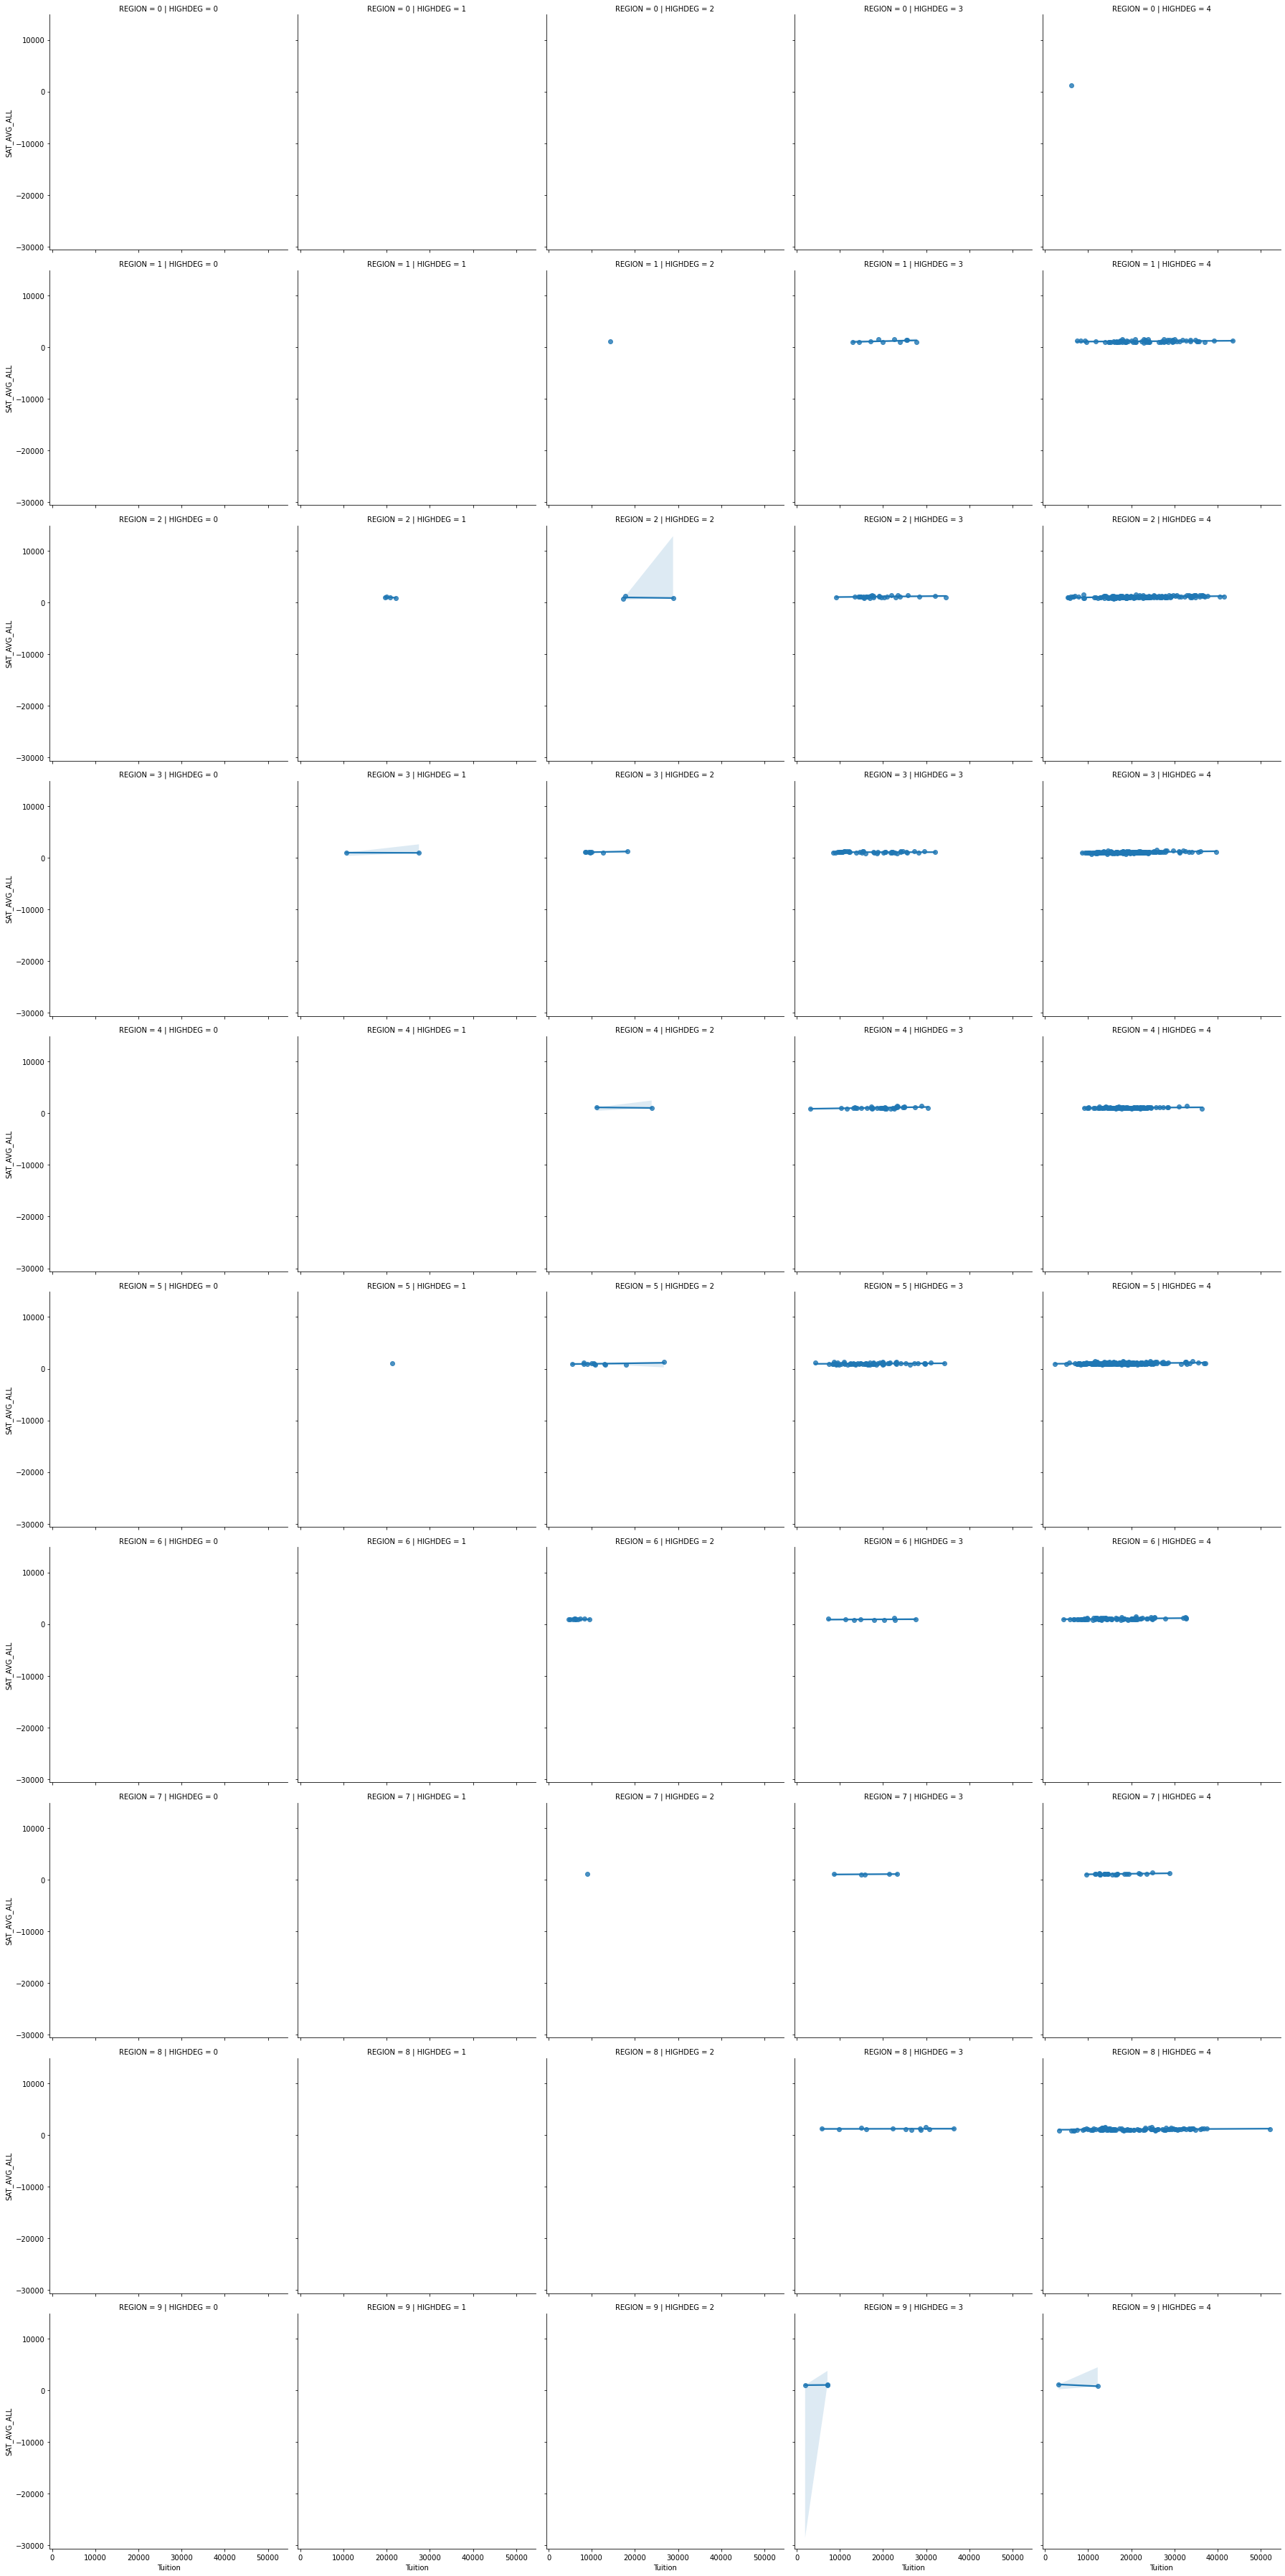

In [6]:
sns.lmplot(data=df, x='Tuition', y='SAT_AVG_ALL',
           col='HIGHDEG', row='REGION')
plt.show()

## Exercise II 

### Building a FacetGrid

Seaborn's **FacetGrid** is the foundation for building data-aware grids. A data-aware grid allows you to create a series of small plots that can be useful for understanding complex data relationships.

For these exercises, we will continue to look at the College Scorecard Data from the US Department 
of Education. This rich dataset has many interesting data elements that we can plot with Seaborn.

When building a **FacetGrid**, there are two steps:
    - Create a **FacetGrid** object with columns, rows, or hue
    - Map individual plot to the grid.

c:\Users\devil\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


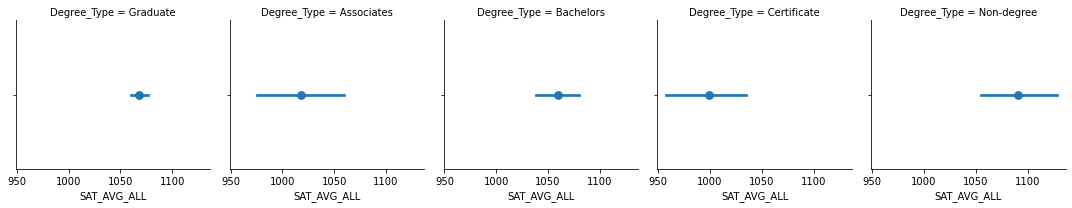

<Figure size 432x288 with 0 Axes>

In [9]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(df, col='Degree_Type',
                   row_order=['Graduate', 'Bachelors',
                              'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show plot
plt.show()
plt.clf()

### Using a catplot

In many cases, Seaborn's ```catplot()``` can be a simpler way to create a *FacetGrid*. Instead of creating a grid and mapping the plot, we can use the ```catplot()``` to create a plot with one line of code.

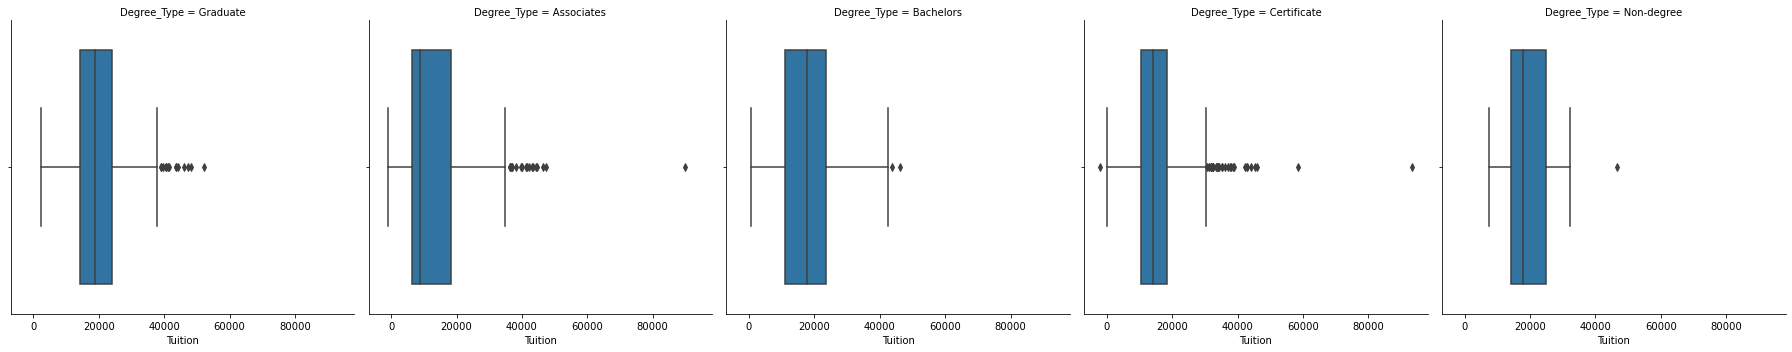

<Figure size 432x288 with 0 Axes>

In [11]:
# Create a factor plot that contains boxplots of Tuition values
sns.catplot(data=df, x='Tuition',
            kind='box', col='Degree_Type')

# Show plot
plt.show()
plt.clf()

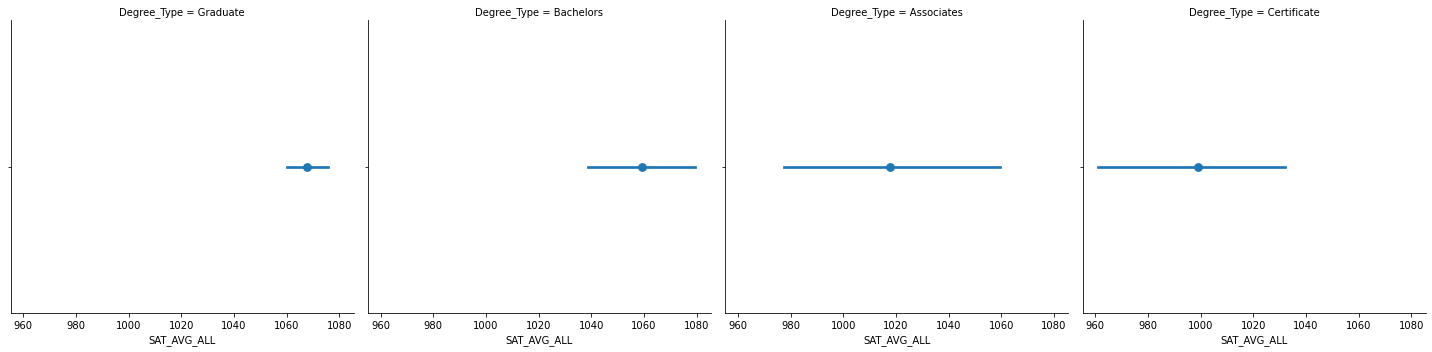

<Figure size 432x288 with 0 Axes>

In [12]:
# Create a facetted point plot of Average SAT_AVG_ALL scores facetted by Degree_Type
sns.catplot(data=df, x='SAT_AVG_ALL',
            kind='point', col='Degree_Type',
            col_order=['Graduate', 'Bachelors',
                       'Associates', 'Certificate'])

# Show plot
plt.show()
plt.clf()

### Using a lmplot

The **lmplot** is used to plot *scatter plots* with regression lines on **FacetGrid objects**. The API is similar to **catplot** with the difference that the default behavior of **lmplot** is to plot regression lines.

For the first set of exercises, we will look at the Undergraduate population (```UG```) and compare it to the percentage of students receiving Pell Grants (```PCTPELL```).

For the second **lmplot** exercise, we can look at the relationships between Average SAT scores and Tuition across the different degree types and public vs. non-profit schools.

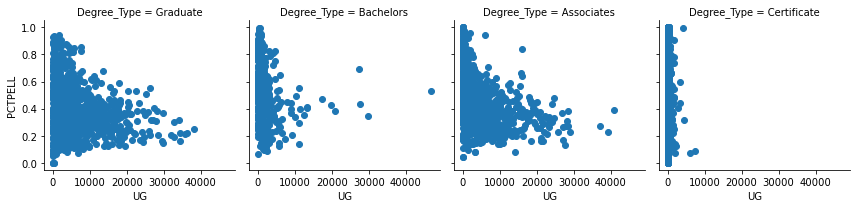

<Figure size 432x288 with 0 Axes>

In [13]:
# Create a FacetGrid varying by column and columns ordered with the degree_order variable
degree_ord = ['Graduate', 'Bachelors','Associates', 'Certificate']
g = sns.FacetGrid(df, col='Degree_Type',
                  col_order=degree_ord)

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

# Show plot
plt.show()
plt.clf()

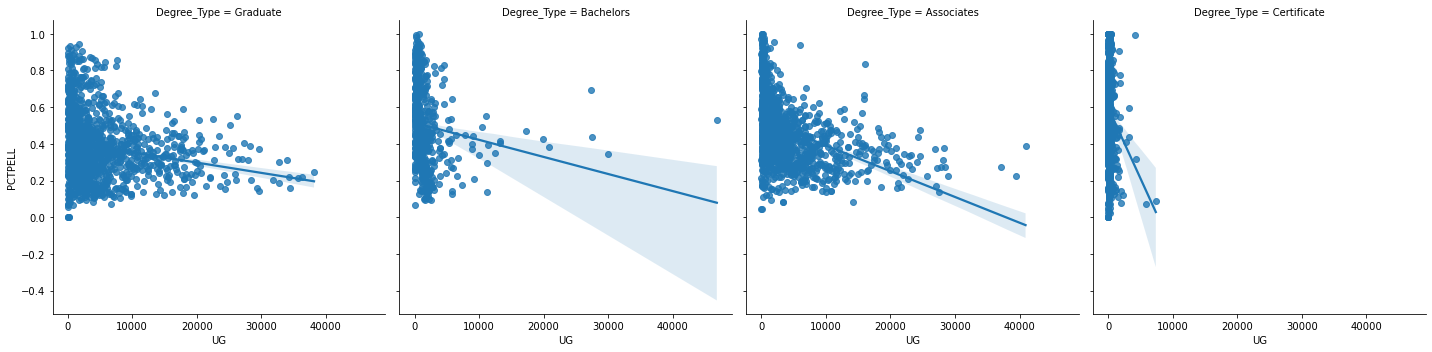

<Figure size 432x288 with 0 Axes>

In [14]:
# Re-create the previous plot as an lmplot
sns.lmplot(data=df, x='UG', y='PCTPELL',
           col='Degree_Type', 
           col_order=degree_ord)

# Show plot
plt.show()
plt.clf()

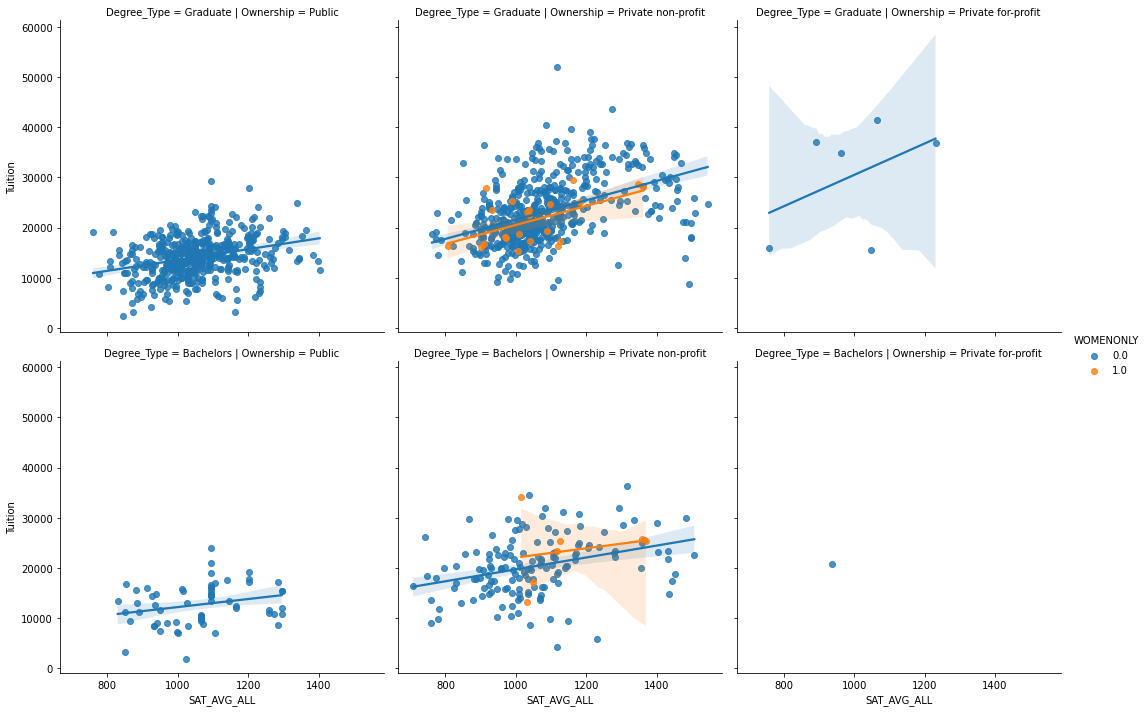

<Figure size 432x288 with 0 Axes>

In [16]:
# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=df, x='SAT_AVG_ALL', y='Tuition',
           col='Ownership', row='Degree_Type',
           row_order=['Graduate', 'Bachelors'],
           hue='WOMENONLY')

# Show plot
plt.show()
plt.clf()

# Lesson II 

## Using PairGrid and pairplot

The next type of *data-aware* grid plots we will discuss are the **PairGrid** and **pairplot**. These plots are similiar to the *FacetGrid, catplot, and lmplots*. They also allows us to see interactions across different columns of data. the difference with these plots is that we **only** define the columns of data we want to compare.

## Pairwise Relationships

* ```PairGrid``` plot allows us to build plots that show the relationships between two data elements.

### Creating a Pairgrid

* The ```PairGrid``` follows similar API to *FacetGrid*.

```python
g = sns.PairGrid(df, vars=['Fair_Mrkt_Rent', 'Median_Income'])
g = g.map(sns.scatterplot)
```

Interesting point with this grid is that we do not define the row and column parameters. Instead we define the variables. In this case, the variables are the dataframe columns that we want to look at.

### Customizing the PairGrid diagonals

```python
g = sns.PairGrid(df, vars=['Fair_Mrkt_Rent', 'Median_Income'])
g = g.map_diag(sns.histplot)
g = g.map_offdiag(sns.scatterplot)
```

In the previous example diagonals contained straight lines, which are not very insightful. You can use the **map_diag** function to define the plotting function for the main diagonal. The **map_offdiag** function defines the other diagonal.

## Pairplot

* ```pairplot``` is a shortcut for the ```PairgGrid```.

```python
sns.pairplot(df, vars=['Fair_Mrkt_Rent', 'Median_Income'], kind='reg', diag_kind='hist')
```

Instead of mapping the plots, we can pass keywords to the function to specify the kind of plots for the main and off diagonals.

The other nice aspect of this function is that it plots regression line for us. This is a useful feature for visualizing potential relationships in the data.

### Customizing a pairplot

* Seaborn can generate complex plots with very little code.

```python
sns.pairplot(df.query('BDRMS < 3'),
            vars=['Fair_Mrkt_Rent', 'Median_Income', 'UTILITY'],
            hue='BEDRMS', palette='husl',
            plot_kws={'alpha': 0.5})
```

To limit the data we are interested in, we filter the data to rentals with less than 3 bedrooms and assign hue to the bedrooms column.

We also pass a keyword argument to reduce the aplha variable to 0.5. This makes the scatter plots transparent so that it is easier to see the observations.

The other item to notice is that we passed in 3 variables, so this plot now contains a total of nine plots.

## Exercise II 

### Building a PairGrid

When exploring a dataset, one of the earliest tasks is exploring the relationship between pairs of 
variables. This step is normally a precursor to additional investigation.

Seaborn supports this pair-wise analysis using the PairGrid. In this exercise, we will look at the 
Car Insurance Premium data we analyzed in Chapter 1.


In [17]:
# Dataset
df = pd.read_csv('datasets/insurance_premiums.csv')


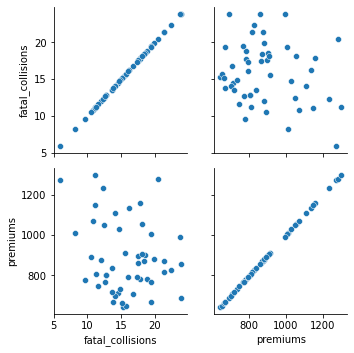

<Figure size 432x288 with 0 Axes>

In [18]:
# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(df, vars=['fatal_collisions', 'premiums'])
g2 = g.map(sns.scatterplot)

# Show plot
plt.show()
plt.clf()

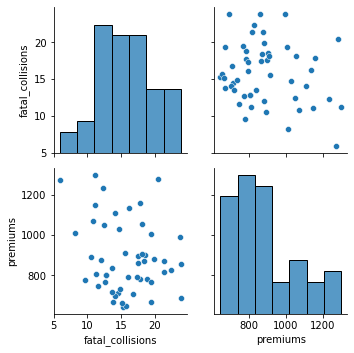

<Figure size 432x288 with 0 Axes>

In [22]:
# Create the same PairGrid but map a histogram on the diag
g = sns.PairGrid(df, vars=['fatal_collisions', 'premiums'])
g2 = g.map_diag(sns.histplot)
g3 = g2.map_offdiag(sns.scatterplot)

# Show plot
plt.show()
plt.clf()

### Using a pairplot

The ```pairplot()``` function is generally a more convenient way to look at pairwise relationships. 
In this exercise, we will create the *same* results as the **PairGrid** using less code.Then, we 
will explore some additional functionality of the ```pairplot()```. We will also use a *different 
palette* and adjust the transparency of the diagonal plots using the *alpha* parameter.

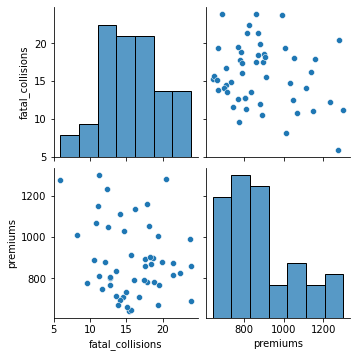

<Figure size 432x288 with 0 Axes>

In [23]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data=df,
             vars=['fatal_collisions', 'premiums'],
             kind='scatter')

# Show plot
plt.show()
plt.clf()

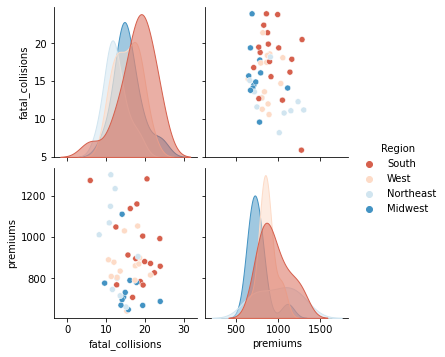

<Figure size 432x288 with 0 Axes>

In [25]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=df,
             vars=['fatal_collisions', 'premiums'],
             kind='scatter',
             hue='Region',
             palette='RdBu',
             diag_kws={'alpha': .5})

# Show plot
plt.show()
plt.clf()

### Additional pairplots

This exercise will go through a couple of more examples of how the ```pairplot()``` can be 
customized for quickly analyzing data and determining areas of interest that might be worthy of 
additional analysis.

One area of customization that is useful is to explicitly define the ```x_vars``` and ```y_vars``` that you wish to examine. Instead of examining all pairwise relationships, this capability allows you to look only at the specific interactions that may be of interest.

We have already looked at using ```kind``` to control the types of plots. We can also use ```diag_kind``` to control the types of plots shown on the diagonals. In the final example, we will include a regression and *kde* plot in the **pairplot**.

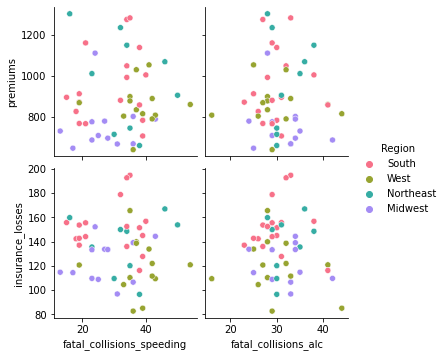

<Figure size 432x288 with 0 Axes>

In [26]:
# Build a pairplot with different x and y variables
sns.pairplot(data=df,
             x_vars=['fatal_collisions_speeding', 'fatal_collisions_alc'],
             y_vars=['premiums', 'insurance_losses'],
             kind='scatter',
             hue='Region',
             palette='husl')

# Show plot
plt.show()
plt.clf()


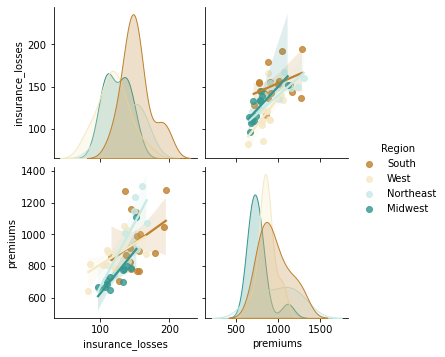

<Figure size 432x288 with 0 Axes>

In [27]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=df,
             vars=['insurance_losses', 'premiums'],
             kind='reg',
             palette='BrBG',
             diag_kind='kde',
             hue='Region')

# Show plot
plt.show()
plt.clf()

# Lesson III

## Using JointGrid and jointplot

Final data-aware grid we will discuss is the **JointGrid** and its companion function, ```jointplot()```. A ```JointGrid()``` allows us to compare the distribution of data between two variables. A J```ointGrid()``` makes use of *scatter plots, regression lines*, as well as *histograms, distributions plots, and kernel density estimates* to give us insights into our data.

### JointGrid() Overview

```JointGrid()``` is similiar to the other Grid plots in that it takes a small number of inputs and creates an insightful visualizations of the data.

<img src='pictures/jointgrid.jpg' />

input to JointGrid() is an X and Y variable. In this case, we are looking at the relationship between College Tuition and the Admissions Rate.

The center of the plot contains a scatter plot of these two variables. The plots alond the x and y-axis show the distribution of the data for each variable.

#### Basic JointGrid

The JointGrid() creation process follows the same steps as the other grids. You must define the grid and map the plots onto the grid.

In [28]:
# Dataset
df = pd.read_csv('datasets/college_datav3.csv')

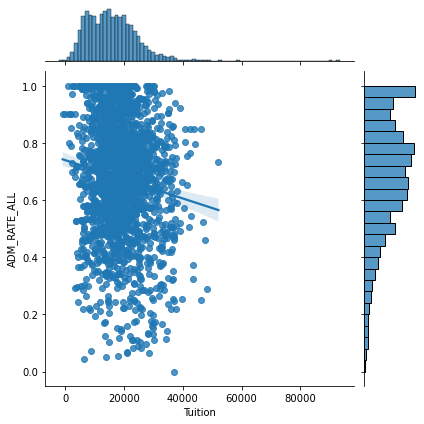

In [29]:
g = sns.JointGrid(data=df, x='Tuition', y='ADM_RATE_ALL')
g.plot(sns.regplot, sns.histplot)

In this case, we define the Tuition and Admission Rate as the X and Y variables. Then we map Seaborn's regplot() and histplot() to the grid.

#### Advanced JointGrid

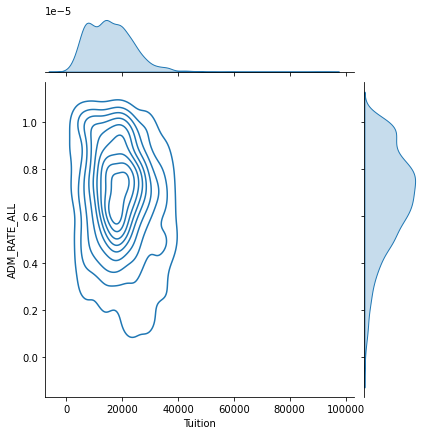

In [30]:
g = sns.JointGrid(data=df, x='Tuition', y='ADM_RATE_ALL')
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot, shade=True)

Here, we show the flexibility available through the ```JointGrid()``` function. The ```plot_joint()``` function specifies that *kde plot* should be included in the center. The kdeplots on the margins are defined with ```plot_marginals()```.

This view of the data helps us understand the distribution of data for these two variables.

In this example, there is a large group of values that have tuition between $15,000 and $20,000 and admission rates around 60%.

### jointplot()

The ```jointplot()``` is easier to use but provides fewer customization capabilities.

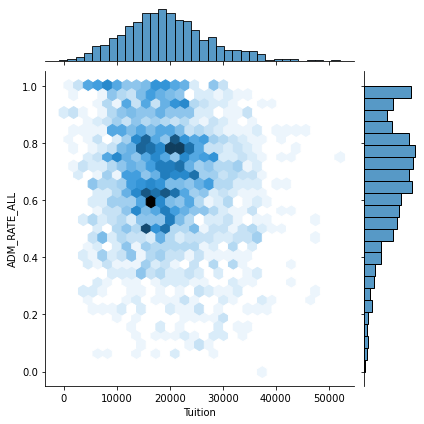

In [31]:
sns.jointplot(data=df, x='Tuition', y='ADM_RATE_ALL', kind='hex')

In this example, we show a hex plot as the method to demonstrate the relationship between the two variables.

#### Customizing a jointplot

The ```jointplot()``` supports simple creation of *scatter, hex, residual, regression, and kde plots*. It can also support adding overlay plots to enhance the final output.

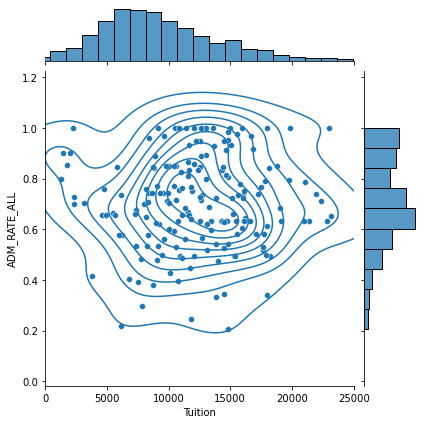

In [32]:
g = (sns.jointplot(x='Tuition',
                   y='ADM_RATE_ALL',
                   kind='scatter',
                   xlim=(0, 25000),
                   data=df.query('UG < 2500 & Ownership == "Public"'))
     .plot_joint(sns.kdeplot))

This example, shows a fairly common paradigm for analyzing the data with Seaborn.

In addition to defining the X and Y variables, we set the limits for the x-axis to cut off at 0 and 25,000.

We also pass keywords to the marginal plot to control the structure of the histogram. In this case, we only want to look at the distribution of results for public universities with an undergraduate enrollment less than 2,500 students.

Finally, by including the ```plot_joint()``` function, a kde plot is overlaid on the scatter plot.

## Exercise III

### Building a JointGrid and jointplot

Seaborn's **JointGrid** combines univariate plots such as *histograms, rug plots and kde plots* with bivariate plots such as *scatter and regression plots*. The process for creating these plots should be familiar to you now. These plots also demonstrate how Seaborn provides convenient functions to combine multiple plots together.

For these exercises, we will use the **bike share** data that we reviewed earlier. In this exercise, we will look at the relationship between humidity levels and total rentals to see if there is an interesting relationship we might want to explore later.

In [33]:
# Bike share data
df = pd.read_csv('datasets/bike_share.csv')

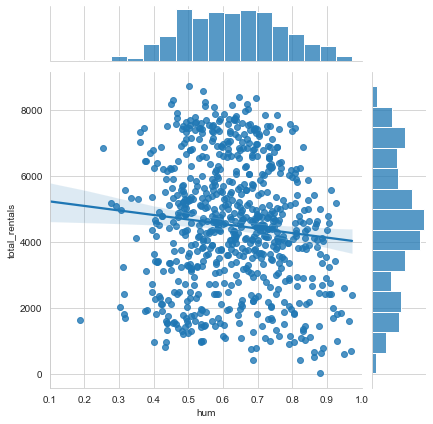

<Figure size 432x288 with 0 Axes>

In [35]:
# Build a JointGrid comparing humidity and total_rentals
sns.set_style('whitegrid')

g = sns.JointGrid(x='hum',
                  y='total_rentals',
                  data=df,
                  xlim=(0.1, 1.0))

g.plot(sns.regplot, sns.histplot)

# Show plot
plt.show()
plt.clf()

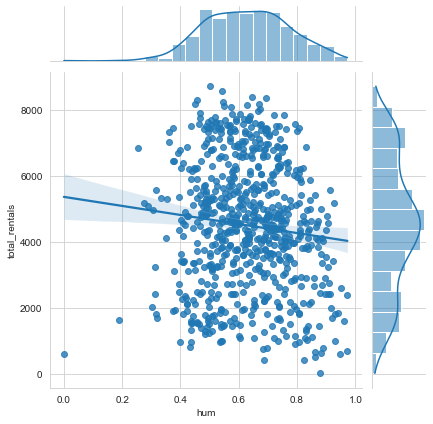

<Figure size 432x288 with 0 Axes>

In [36]:
# Create a jointplot similar to the JointGrid
sns.jointplot(x='hum', y='total_rentals',
              data=df, kind='reg')

# Show plot
plt.show()
plt.clf()

### Jointplots and regression

Since the previous plot does not show a relationship between humidity and rental amounts, we can look at another variable that we reviewed earlier. Specifically, the relationship between ```temp``` and ```total_rentals```.

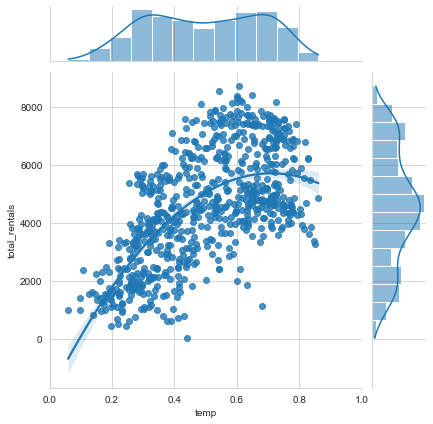

<Figure size 432x288 with 0 Axes>

In [37]:
# Plot temp vs. Total_rentals as a regression plot

sns.jointplot(x='temp',
              y='total_rentals',
              kind='reg',
              data=df,
              order=2,
              xlim=(0, 1))

# Show plot
plt.show()
plt.clf()

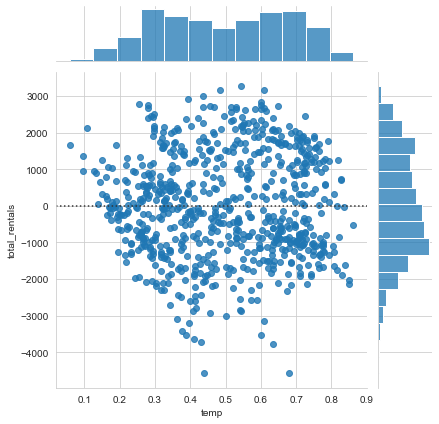

<Figure size 432x288 with 0 Axes>

In [41]:
# Plot a jointplot showing the residuals
sns.jointplot(x='temp', y='total_rentals',
              kind='resid',
              data=df,
              order=2)

# Show plot
plt.show()
plt.clf()

# Complex Jointplots

The **jointplot** is a convenience wrapper around many of the **JointGrid** functions. However, it 
is possible to overlay some of the **JointGrid** plots on top of the standard **jointplot**.

In this example, we can look at the different distributions for riders that are considered casual 
versus those that are registered.

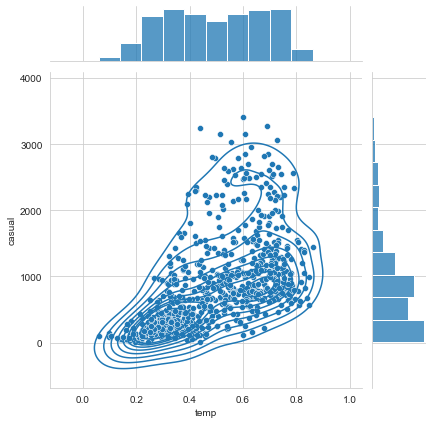

<Figure size 432x288 with 0 Axes>

In [43]:
# Create a jointplot of temp vs. casual riders 
# Include a kdeplot over the scatter plot
g = sns.jointplot(x='temp', y='casual',
                  kind='scatter',
                  data=df,
                  marginal_kws=dict(bins=10))

g.plot_joint(sns.kdeplot)

# Show plot
plt.show()
plt.clf()

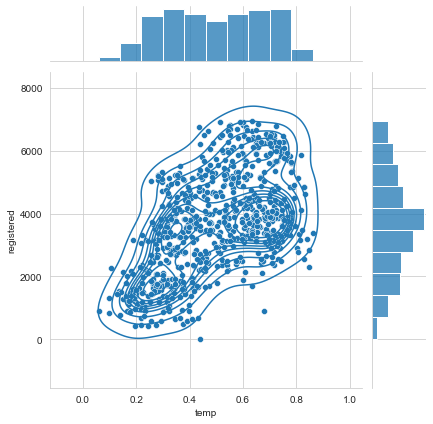

<Figure size 432x288 with 0 Axes>

In [44]:
# Replicate the above plot but only for registered riders
g = sns.jointplot(x='temp', y='registered',
                  kind='scatter',
                  data=df,
                  marginal_kws=dict(bins=10))

g.plot_joint(sns.kdeplot)

# Show plot
plt.show()
plt.clf()

# Lesson IV

## Selecting Seaborn Plots

The power of *Seaborn* is the way that the different plots build on each other. For instance, a ```kdeplot``` can be used on its own or it can be generated from a ```displot()```. In addition, the ```PairGrid()``` and ```JointGrid()``` plots build on top of the regression and distribution plots.

<img src='pictures/allplots.jpg' />

### Univariate Distribution Analysis

* ```displot()``` is the best place to start for this analysis
* ```rugplot()```, ```kdeplot()``` and ```ecdfplot()``` can be useful alternatives

<img src='pictures/univariate.jpg' />

### Regression Analysis

Regression plot is an example of a plot that shows the relationship between two variables.

*matplotlib*'s ```scatter()``` plot is a very simple method to compare the interaction of two variables on the x and y-axis.

The ```lmplot()``` combines many of these features of the underlying ```regplot()``` and ```residplot()``` in addition to the ability to plot the data on a ```FacetGrid()```.

In many intances, ```lmplot()``` is the best function to use for determining linear relationships between data.

<img src='pictures/regression.jpg' />

### Categorical plots

In most scenaries, it makes sense to use one of the categorical plots such as the ```boxplot()``` or ```violinplot()``` to examine the distribution of the variables.

Then, follow up with the statistical estimation plots such as the *point*, *bar*, or *countplot*.

If you need to facet the data across rows or columns, use a ```catplot()```.

<img src='pictures/categorical.jpg' />

### pairplot() and jointplot()

```pairplot()``` and ```jointplot()``` visualizations are going to be most useful after you have done some preliminary analysis of regressions or distributions of the data.

* Perform regression analysis with lmplot
* Analyze distributions with displot

Once you're familiar with the data, the pairplot and jointplot can be very useful in understanding how two or more variables interact with each other.

<img src='pictures/pairandjoint.jpg' />